# Github - Get weekly commits activity

This notebook enables us to keep track of the commits made over time

Tags: #github #commits #weekly-commits

## Input

In [76]:
import pandas as pd
import requests
import os
import plotly.express as px

## Setup Github
**How to find your personal access token on Github?**

- First we need to create a personal access token to get the details of our organization from here: https://github.com/settings/tokens
- You will be asked to select scopes for the token. Which scopes you choose will determine what information and actions you will be able to perform against the API.
- You should be careful with the ones prefixed with write:, delete: and admin: as these might be quite destructive.
- You can find description of each scope in docs here (https://docs.github.com/en/developers/apps/building-oauth-apps/scopes-for-oauth-apps).

In [2]:
REPO_URL = "https://api.github.com/repos/jupyter-naas/awesome-notebooks"
GITHUB_TOKEN = "ghp_amVJP1qcXUt37htqCRRmfm1ya********"

## Model

### Connect to Github

In [3]:
token = os.getenv("Github_token",GITHUB_TOKEN)
params = {
    "state": "open",
}

headers = {'Authorization': f'token {token}'}

### Collecting information on commits using Github API

In [4]:
page=0
while True:
    page+=1
    query_url = REPO_URL + f'/commits?page={page}'
    m = requests.get(query_url, params=params, headers=headers).json()
    if m!=[]:
        continue
    else:
        break
total_pages = page-1

In [11]:
print('This cell could take some time to complete its exectuion. Please be patient till the end!!')
dates, names, emails, commit_messages, times = [], [],[],[],[]

for page_num in range(total_pages, 0, -1):
    query_url = REPO_URL + f'/commits?page={page_num}'
    m = requests.get(query_url, params=params, headers=headers).json()
    if m!=[]:
        for commit_details in m:
            date, time = commit_details['commit']['author']['date'].split('T')[0], commit_details['commit']['author']['date'].split('T')[-1]
            dates.append(date)
            times.append(time)
            names.append(commit_details['commit']['author']['name'])
            emails.append(commit_details['commit']['author']['email'])
            commit_messages.append(commit_details['commit']['message'])
    else:
        break

print('\nProcess completed!')

This cell could take some time to complete its exectuion. Please be patient till the end!!

Process completed!


## Output

**Dataframe with the required commit details**

In [15]:
data = pd.DataFrame()
data['commit_date'], data['commit_time'], data['name'], data['email'], data['commit_message'] = dates, times, names, emails, commit_messages
data.head()

,commit_date,commit_time,name,email,commit_message
0,2020-10-29,08:39:13Z,BobCashStory,47117399+BobCashStory@users.noreply.github.com,Update README.md
1,2020-10-29,08:37:50Z,BobCashStory,47117399+BobCashStory@users.noreply.github.com,Update README.md
2,2020-10-29,08:37:01Z,BobCashStory,47117399+BobCashStory@users.noreply.github.com,Update README.md
3,2020-10-29,08:36:19Z,BobCashStory,47117399+BobCashStory@users.noreply.github.com,Update README.md
4,2020-10-29,08:35:09Z,BobCashStory,47117399+BobCashStory@users.noreply.github.com,Update README.md


In [68]:
new_data = pd.DataFrame()
new_data['commit_date'], new_data['commit_count'] = dates, 1
new_data['commit_date'] = pd.to_datetime(new_data['commit_date'])
new_data = new_data.groupby('commit_date').sum().reset_index().sort_values('commit_date')
new_data.head()

,commit_date,commit_count
0,2020-10-16,1
1,2020-10-29,17
2,2020-11-02,6
3,2020-11-06,2
4,2020-11-07,7


### Grouping commits weekly

In [69]:
new_data = new_data.groupby(pd.Grouper(freq='W', key='commit_date')).sum().reset_index()
new_data.rename(columns={'commit_count':'commits_this_week'}, inplace=True)
new_data.head()

,commit_date,commits_this_week
0,2020-10-18,1
1,2020-10-25,0
2,2020-11-01,17
3,2020-11-08,15
4,2020-11-15,21


### Plot a line chart of weekly commit activity

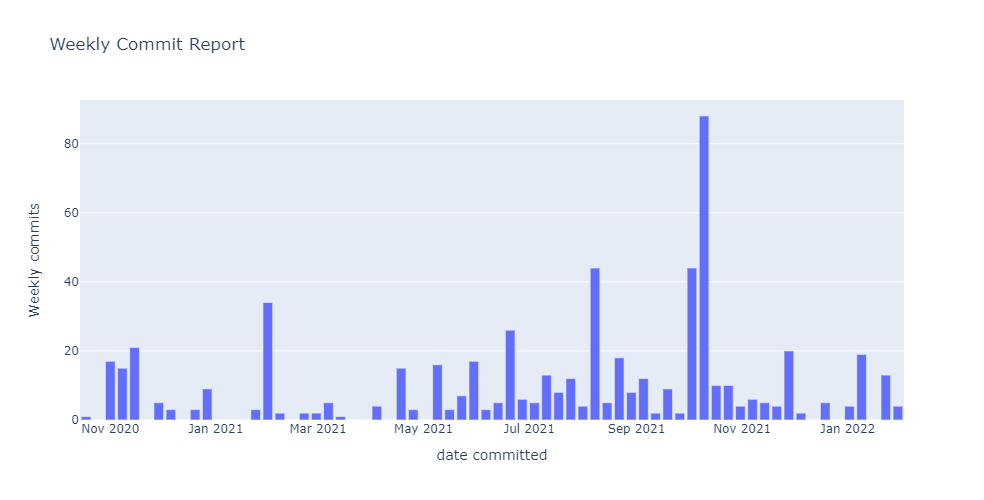

In [75]:
px.bar(new_data,
       title = "Weekly Commit Report",
       x="commit_date",
       y="commits_this_week",
       labels={
           'commit_date':'date committed',
           'commits_this_week':"Weekly commits"
      },
      width= 800, 
      height = 500)